In [207]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [208]:
# Load dataset
df_startup_profit = pd.read_csv('startup.csv')

In [209]:
# Data Preparation
print('Shape of dataframe:', df_startup_profit.shape)
df_startup_profit=df_startup_profit.fillna(0)
df_startup_profit.head()

Shape of dataframe: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [210]:
df_startup_profit.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [211]:
df_startup_profit.duplicated().any()

False

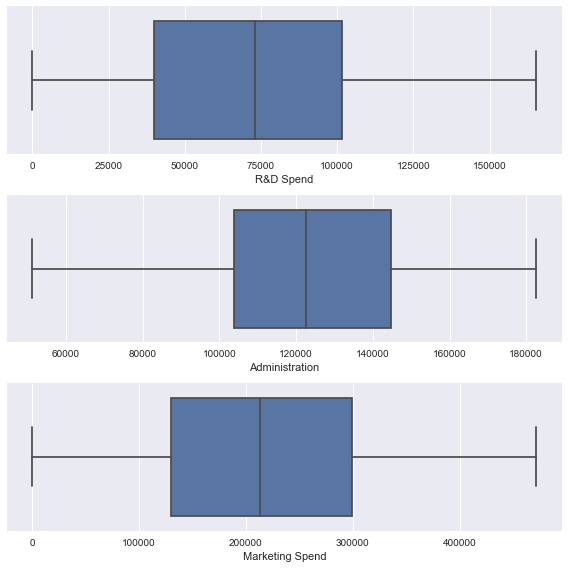

In [212]:
#Data Checking with plotting
fig, axs = plt.subplots(3, figsize = (8,8))
plt1 = sns.boxplot(df_startup_profit['R&D Spend'], ax = axs[0])
plt2 = sns.boxplot(df_startup_profit['Administration'], ax = axs[1])
plt3 = sns.boxplot(df_startup_profit['Marketing Spend'], ax = axs[2])
plt.tight_layout()

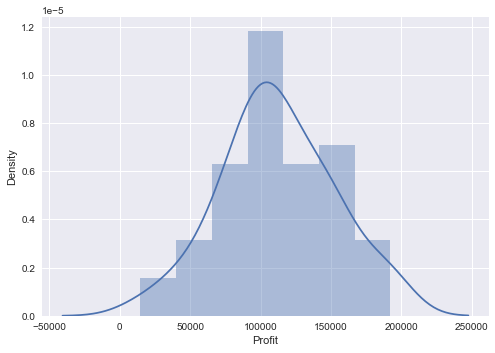

In [213]:
sns.distplot(df_startup_profit['Profit']);

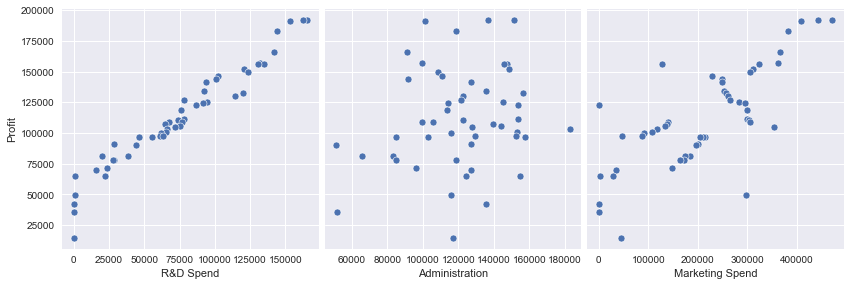

In [214]:
sns.pairplot(df_startup_profit, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars='Profit', height=4, aspect=1, kind='scatter')
plt.show()

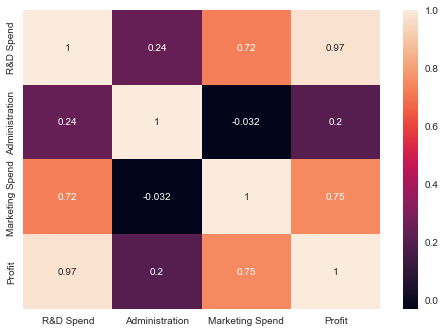

In [215]:
# Checking data relation of each feature with Profit
sns.heatmap(df_startup_profit.corr(), annot = True)
plt.show()

In [216]:
# Making Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [217]:
# Setting the value for X and Y
x = df_startup_profit[['R&D Spend']]
y = df_startup_profit['Profit']

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 500)

In [219]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [220]:
# Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  51408.85586896088
Coefficient: [0.82498259]


In [221]:
print('Regression Equation: Profit =  51408.85586896088 + 0.82498259 * R&D Spend')


Regression Equation: Profit =  51408.85586896088 + 0.82498259 * R&D Spend


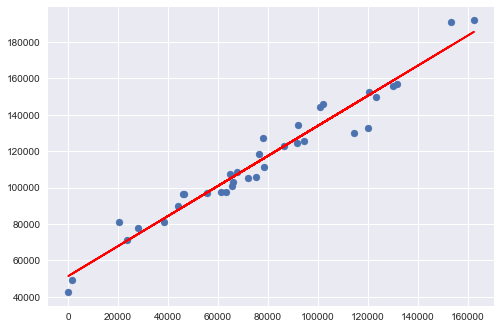

In [222]:
# Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train,  51408.85586896088+ 0.82498259 * x_train, 'r')
plt.show()

In [236]:
# Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train) 

In [241]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 75055.95879423 114968.82267882  64200.81314328 112453.07952385
  52234.02820361  69705.10522459  75130.67746729 128844.81532445
 168644.93708847 187819.06691634 102553.22246143 170513.58040055
  51408.85586896 162464.26653221  51856.03768114]


In [242]:
# Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
36,90708.19,75055.958794
24,108552.04,114968.822679
43,69758.98,64200.813143
22,110352.25,112453.079524
45,64926.08,52234.028204
44,65200.33,69705.105225
40,78239.91,75130.677467
12,141585.52,128844.815324
4,166187.94,168644.937088
0,192261.83,187819.066916


In [243]:
#Predict for any value
slr.predict([[80000]])

array([117407.46296104])

In [244]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 94.54


In [245]:
accuracy_single = ('{:.2f}'.format(slr.score(x,y)*100))
accuracy_single = float(accuracy_single)

In [246]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 9595.361120648528
Mean Square Error: 167462582.6422542
Root Mean Square Error: 12940.733466162348


In [ ]:
#Multi Linear Regression
#Setting the value for X and Y
x = df_startup_profit[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df_startup_profit['Profit']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=500)  
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

60540.10055405938


[('R&D Spend', 0.8285435802664702),
 ('Administration', -0.09488929661947774),
 ('Marketing Spend', 0.009786345804895541)]

In [ ]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train) 

In [ ]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 74201.29710148 116329.39761962  61647.80642964 113165.43659984
  49606.67257795  64503.17228711  74806.60295911 128673.98188831
 173193.57482865 189166.02511335 101823.95107891 172648.36964575
  49881.66924241 159357.15946982  56079.34149337]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
36,90708.19,74201.297101
24,108552.04,116329.397620
43,69758.98,61647.806430
22,110352.25,113165.436600
45,64926.08,49606.672578
44,65200.33,64503.172287
40,78239.91,74806.602959
12,141585.52,128673.981888
4,166187.94,173193.574829
0,192261.83,189166.025113


In [ ]:
#Predict for any value
mlr.predict([[15000, 12000, 30000]])

array([72123.17307277])

In [ ]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 94.78


In [ ]:
accuracy_multi=('{:.2f}'.format(mlr.score(x,y)*100))
accuracy_multi=float(accuracy)

In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 9910.152821993808
Mean Square Error: 176907840.95380896
Root Mean Square Error: 13300.670695638208


In [230]:
#Accuracy Comparison
print('Multi linear is ',accuracy_multi-accuracy_single,' more accurate')

Multi linear is  0.23999999999999488  more accurate
